# 상관분석

## #01. 작업준비
### 패키지 가져오기



In [38]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import sys
import seaborn as sb
import os 
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r


ImportError: cannot import name 'pearson_r' from 'helper' (unknown location)

### 데이터 가져오기

In [3]:
df= pd.read_excel('https://data.hossam.kr/E03/mtcars.xlsx',index_col="name")
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


## #02. 데이터 전처리
분석 대상칼럼만 추출


In [4]:
df=df.filter(['mpg','disp','hp','drat','wt','qsec','vs'])
df

,mpg,disp,hp,drat,wt,qsec,vs
name,,,,,,,
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46,0
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02,0
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,1
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,1
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02,0
Valiant,18.1,225.0,105,2.76,3.460,20.22,1
Duster 360,14.3,360.0,245,3.21,3.570,15.84,0
Merc 240D,24.4,146.7,62,3.69,3.190,20.00,1
Merc 230,22.8,140.8,95,3.92,3.150,22.90,1


## #03. 산점도 행렬

각 변수들을 교차로 표현한 산점도 그래프의 묶음


In [5]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["axes.unicode_minus"] = False




### 1. 기본사용

대각 원소자리에 히스토 그램이 표현된다.

'pairplot()' 메서드에 'dian_kind=hist'이 디폴트로 설정되어있음

카테고리 타입은 자동으로 제외됨

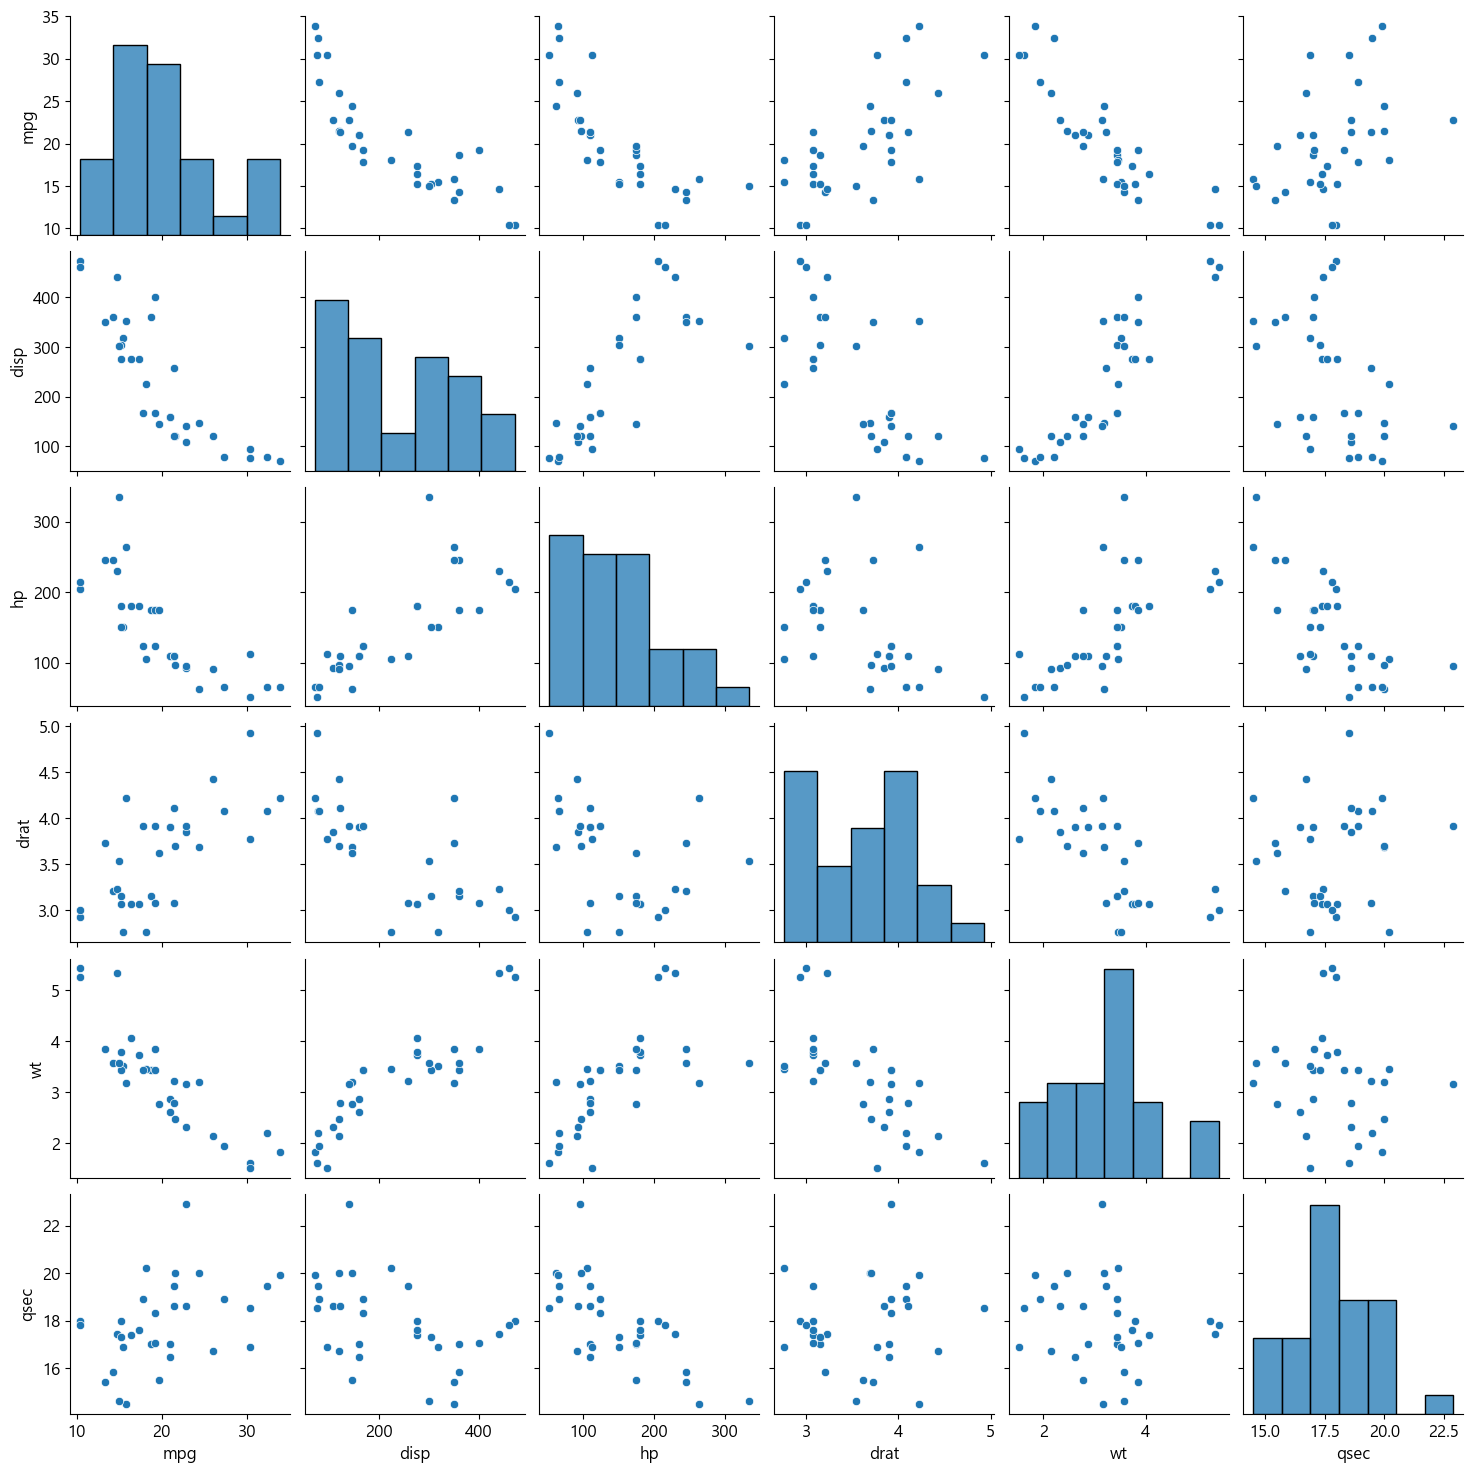

In [11]:
sb.pairplot(df)
plt.show()
plt.close()

### 2. 파라미터 사용



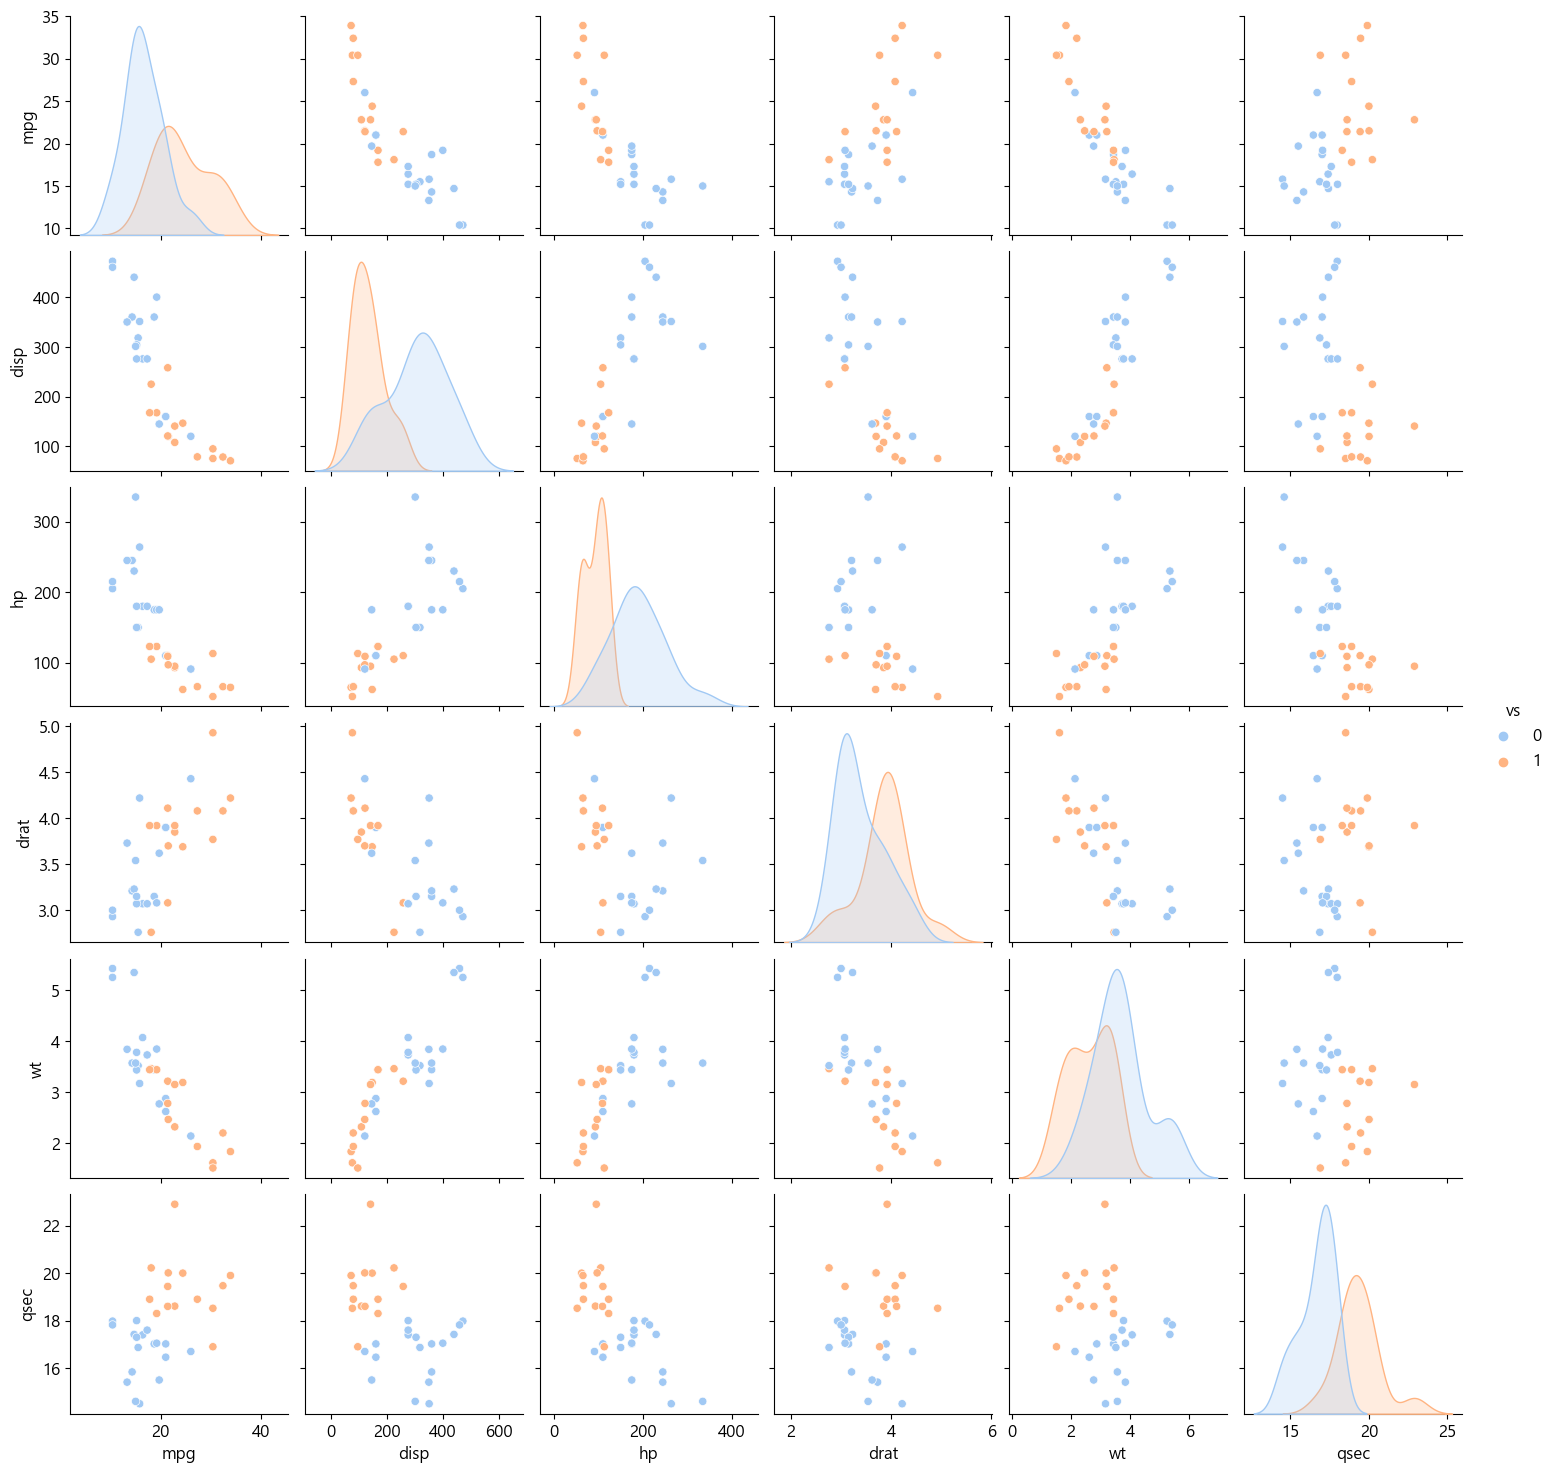

In [7]:
sb.pairplot(df,
            diag_kind = 'kde', ### 대각선에 커널밀도분포 표시
            hue='vs',          ### 범주형 변수 표시
            palette='pastel',  ### 색상
                )
plt.show()
plt.close()

### 대각선 기준 다르게 표현하기

- 대각선 위 : 2차원 밀도함수 + 추세선

- 대각선 아래 : 2차원 밀도함수 + 산포도

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been as

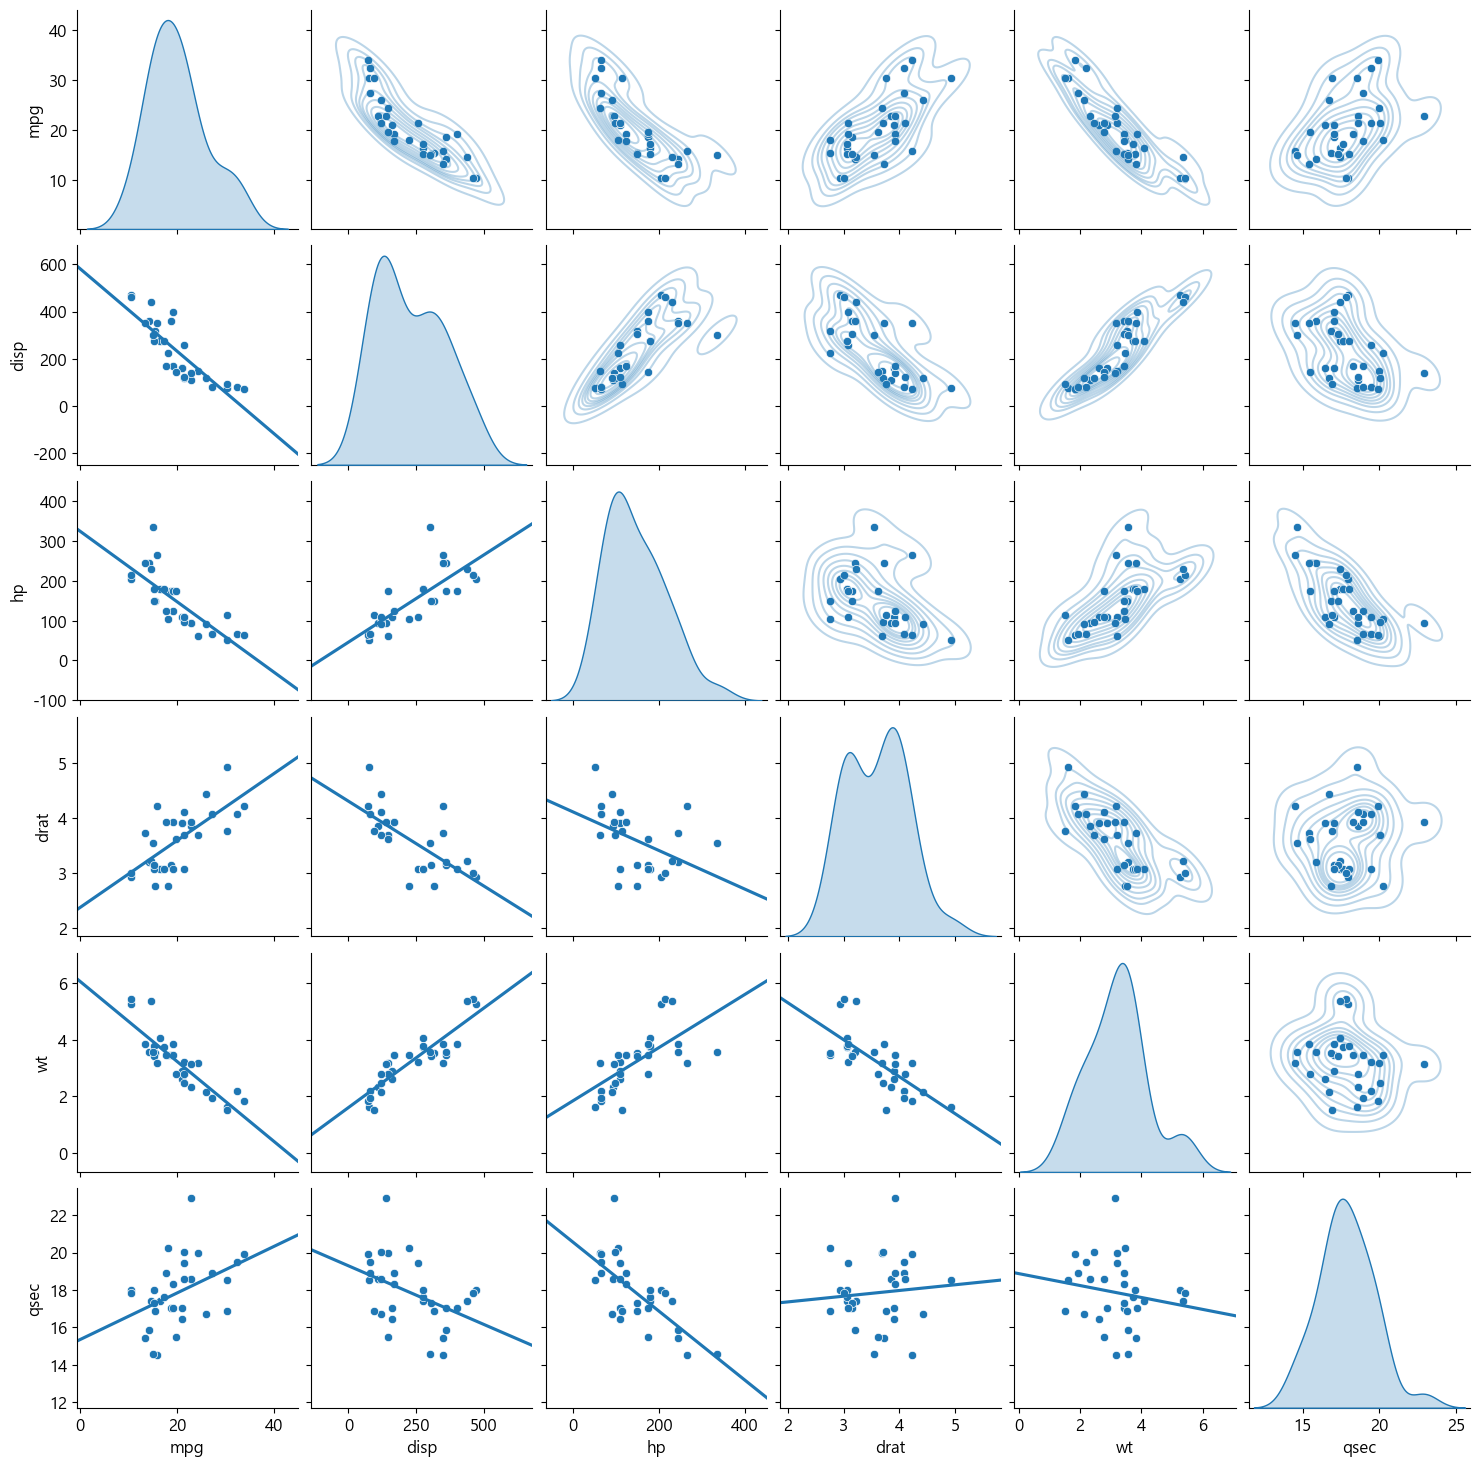

In [14]:
g = sb.pairplot(df,
            diag_kind = 'kde', ### 대각선에 커널밀도분포 표시
                      ### 범주형 변수 표시
            palette='pastel',  ### 색상
                )

g.map_upper(sb.kdeplot,alpha=0.3)
g.map_lower(sb.regplot,scatter=False,truncate = False,ci=False)
plt.show()
plt.close()

## #04. 인터렉티브 그래프


plotly, cufflinks 패키지 설치 필요

In [16]:
import plotly.figure_factory as ff 

## Cufflinks wrapper on plotly

import cufflinks as cf
# plotly + cufflinks in offline mode

from plotly.offline import iplot
cf.go_offline()

# set the global theme

cf.set_config_file(world_readable =True, theme = "pearl",offline=True)

In [17]:
fig = ff.create_scatterplotmatrix(
    df,
    height=1200,
    width=1200,
    diag='histogram'
)
iplot(fig)

### 상관계수 행렬

여러개의 변수를 갖는 데이터프레임에 대해서도 사용 가능

In [19]:

df.corr(method='pearson')

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


### 산점도 행렬 시각호

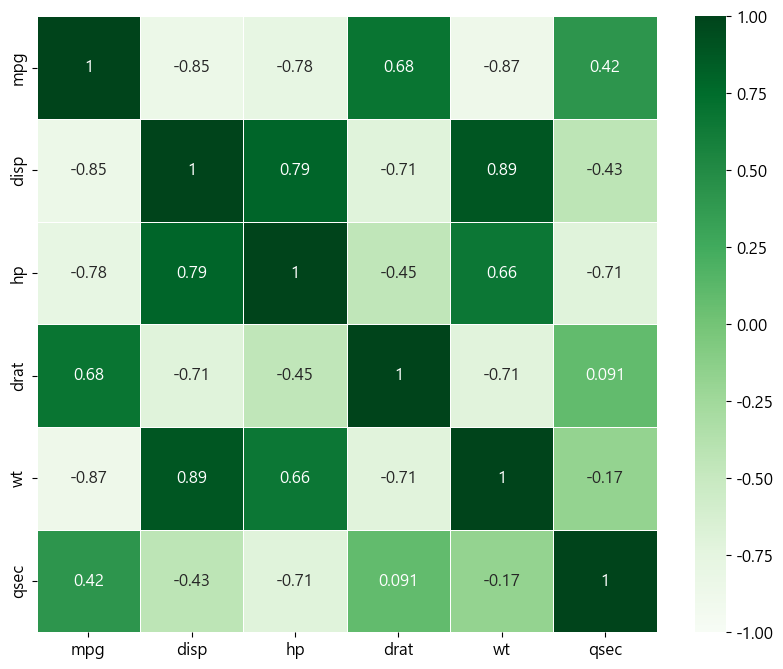

In [21]:
plt.rcParams["figure.figsize"] = (10,8)
sb.heatmap(df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

### 분석결과 검정

> 일일이 해줘여ㅑ함


In [24]:
print(stats.pearsonr(df['mpg'], df['disp']))
print(stats.pearsonr(df['disp'], df['hp']))
print(stats.pearsonr(df['hp'], df['drat']))
print(stats.pearsonr(df['drat'], df['wt']))
print(stats.pearsonr(df['wt'], df['qsec']))
print(stats.pearsonr(df['qsec'], df['mpg']))

PearsonRResult(statistic=-0.8475513792624787, pvalue=9.380326537381379e-10)
PearsonRResult(statistic=0.7909485863698065, pvalue=7.14267865573725e-08)
PearsonRResult(statistic=-0.4487591168729195, pvalue=0.009988771893526243)
PearsonRResult(statistic=-0.7124406466973718, pvalue=4.7842600661325326e-06)
PearsonRResult(statistic=-0.17471587871340488, pvalue=0.3388682841349162)
PearsonRResult(statistic=0.41868403392177833, pvalue=0.017081988496519568)


### 반복문을  통한 일괄 검정

In [30]:
names = df.columns
n = len(names)
pv = 0.05
data = []

for i in range(n):
    j = i+1 if i < (n-1) else 0

    fields = names[i] + "vs" + names[j]
    s, p = stats.pearsonr(df[names[i]],df[names[j]])
    result=p<pv
    data.append({'fields': fields,"statistics" : s,'p-value': p,'result':result })
rdf = pd.DataFrame(data)
rdf.set_index('fields',inplace =True)
rdf
    

,statistics,p-value,result
fields,,,
mpgvsdisp,-0.847551,9.380327e-10,True
dispvshp,0.790949,7.142679e-08,True
hpvsdrat,-0.448759,9.988772e-03,True
dratvswt,-0.712441,4.784260e-06,True
wtvsqsec,-0.174716,3.388683e-01,False
qsecvsmpg,0.418684,1.708199e-02,True
